# Customer Lifetime value


# EDA

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures

import warnings
warnings.filterwarnings('ignore')

In [2]:
data_file = "../csv/clv/customer_lifetime_value.csv"
dataset = pd.read_csv(data_file)
ds = dataset.copy()
ds.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [3]:
ds.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


### Сразу можем дропнуть колонку Customer	

In [4]:
col_to_drop = ['Customer']

## Посмотрим на нашу целевую переменную

<AxesSubplot:xlabel='Customer Lifetime Value'>

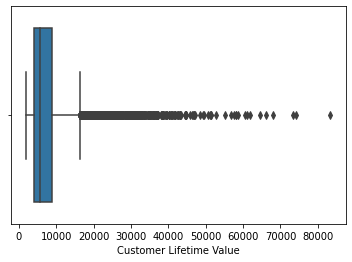

In [5]:
sns.boxplot(ds['Customer Lifetime Value'])

<AxesSubplot:>

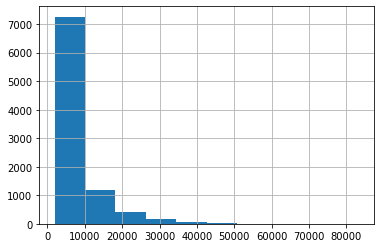

In [6]:
ds['Customer Lifetime Value'].hist()

In [7]:
ds[ds['Customer Lifetime Value']  > 40000].count()

Customer                         60
State                            60
Customer Lifetime Value          60
Response                         60
Coverage                         60
Education                        60
Effective To Date                60
EmploymentStatus                 60
Gender                           60
Income                           60
Location Code                    60
Marital Status                   60
Monthly Premium Auto             60
Months Since Last Claim          60
Months Since Policy Inception    60
Number of Open Complaints        60
Number of Policies               60
Policy Type                      60
Policy                           60
Renew Offer Type                 60
Sales Channel                    60
Total Claim Amount               60
Vehicle Class                    60
Vehicle Size                     60
dtype: int64

In [8]:
ds['Customer Lifetime Value'].describe(percentiles=[0.99,0.95])

count     9134.000000
mean      8004.940475
std       6870.967608
min       1898.007675
50%       5780.182197
95%      22064.361267
99%      35971.104520
max      83325.381190
Name: Customer Lifetime Value, dtype: float64

In [9]:
ds = ds[ds['Customer Lifetime Value'] < 30000]

<AxesSubplot:>

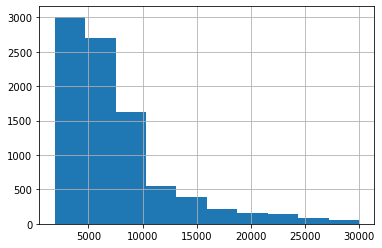

In [10]:
ds['Customer Lifetime Value'].hist()

## Доход

<AxesSubplot:ylabel='Frequency'>

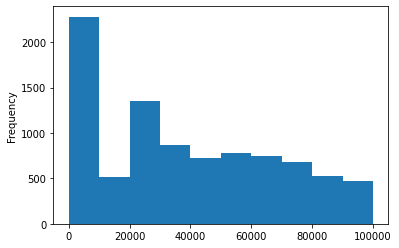

In [11]:
ds['Income'].plot.hist()

In [12]:
ds[ds['Income'] == 0]['EmploymentStatus'].unique()

array(['Unemployed'], dtype=object)

### Похоже, что нули в колонке Income не являются ошибками данных

In [13]:
ds['Income'].isna().any()

False

### Эту колонку можно оставить без изменений

# Monthly Premium Auto

<AxesSubplot:ylabel='Frequency'>

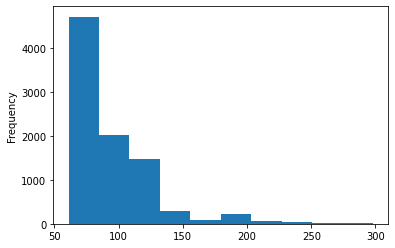

In [14]:
ds['Monthly Premium Auto'].plot.hist()

In [15]:
ds['mon_prem_auto_log'] = np.log(ds['Monthly Premium Auto'])

<AxesSubplot:>

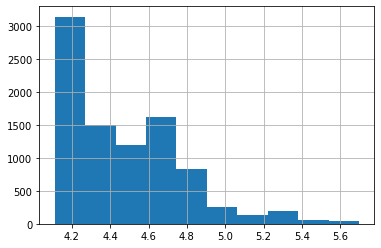

In [16]:
ds['mon_prem_auto_log'].hist()

In [17]:
col_to_drop.append('Monthly Premium Auto')

# Months Since Last Claim

<AxesSubplot:>

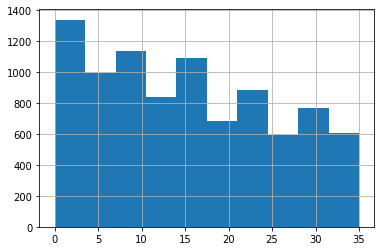

In [18]:
ds['Months Since Last Claim'].hist()

### Тут все хорошо, оставляем как есть

# Months Since Policy Inception

<AxesSubplot:>

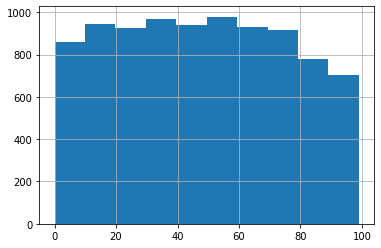

In [19]:
ds['Months Since Policy Inception'].hist()

### Тоже оставляем

# Number of Open Complaints

<AxesSubplot:>

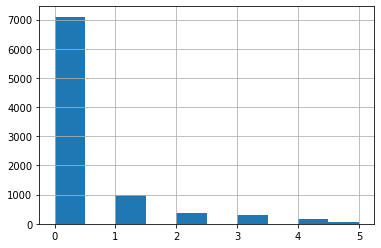

In [20]:
ds['Number of Open Complaints'].hist()

### Тут лучше сделать 0 / не 0

In [21]:
ds['сomplaints'] = ds['Number of Open Complaints'].apply(lambda x: 1 if x != 0 else 0)

<AxesSubplot:>

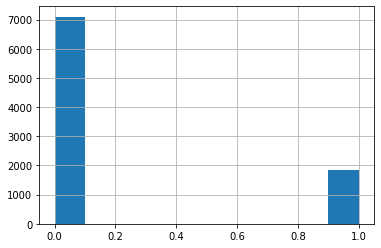

In [22]:
ds['сomplaints'].hist()

In [23]:
col_to_drop.append('Number of Open Complaints')

# State

<AxesSubplot:>

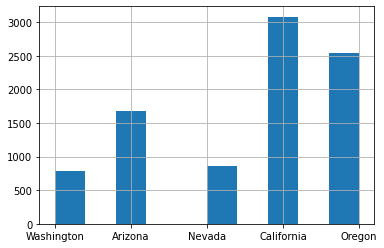

In [24]:
ds["State"].hist()

### Тут хорошо подойдет OneHotEncoding

In [25]:
ds = pd.get_dummies(ds, prefix='state_', columns=['State'],drop_first=True)

In [26]:
ds.head()

,Customer,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,mon_prem_auto_log,сomplaints,state__California,state__Nevada,state__Oregon,state__Washington
0,BU79786,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,...,Agent,384.811147,Two-Door Car,Medsize,4.234107,0,0,0,0,1
1,QZ44356,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,...,Agent,1131.464935,Four-Door Car,Medsize,4.543295,0,0,0,0,0
2,AI49188,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,...,Agent,566.472247,Two-Door Car,Medsize,4.682131,0,0,1,0,0
3,WW63253,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,...,Call Center,529.881344,SUV,Medsize,4.663439,0,1,0,0,0
4,HB64268,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,...,Agent,138.130879,Four-Door Car,Medsize,4.290459,0,0,0,0,1


# Response

<AxesSubplot:>

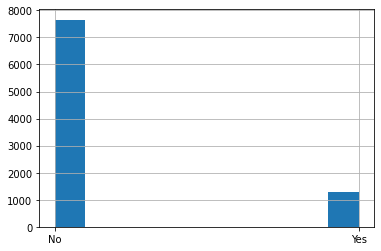

In [27]:
ds['Response'].hist()

In [28]:
ds = pd.get_dummies(ds, prefix='response_', columns=['Response'],drop_first=True)

# Coverage

<AxesSubplot:>

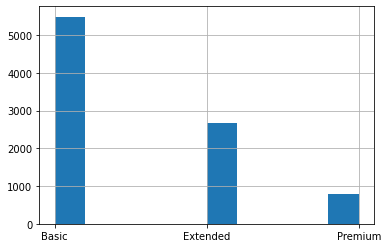

In [29]:
ds['Coverage'].hist()

In [30]:
ds = pd.get_dummies(ds, prefix='coverage_', columns=['Coverage'],drop_first=True)

In [31]:
ds.head()

,Customer,Customer Lifetime Value,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,...,Vehicle Size,mon_prem_auto_log,сomplaints,state__California,state__Nevada,state__Oregon,state__Washington,response__Yes,coverage__Extended,coverage__Premium
0,BU79786,2763.519279,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,...,Medsize,4.234107,0,0,0,0,1,0,0,0
1,QZ44356,6979.535903,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,...,Medsize,4.543295,0,0,0,0,0,0,1,0
2,AI49188,12887.431650,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,...,Medsize,4.682131,0,0,1,0,0,0,0,1
3,WW63253,7645.861827,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,...,Medsize,4.663439,0,1,0,0,0,0,0,0
4,HB64268,2813.692575,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,...,Medsize,4.290459,0,0,0,0,1,0,0,0


# Education

<AxesSubplot:>

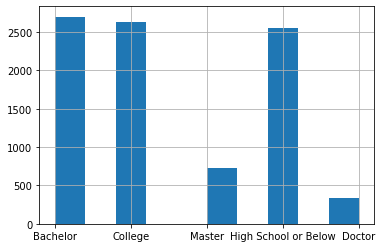

In [32]:
ds['Education'].hist()

In [33]:
ds = pd.get_dummies(ds, prefix='edu_', columns=['Education'],drop_first=True)

# EmploymentStatus

<AxesSubplot:>

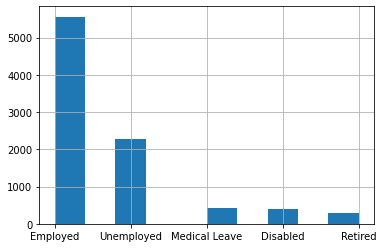

In [34]:
ds['EmploymentStatus'].hist()

In [35]:
ds = pd.get_dummies(ds, prefix='emp_stat_', columns=['EmploymentStatus'],drop_first=True)

# Effective To Date

In [36]:
ds['Effective To Date'] = pd.to_datetime(
    ds['Effective To Date'], 
    format='%m/%d/%y', 
    errors='ignore'
)

<AxesSubplot:>

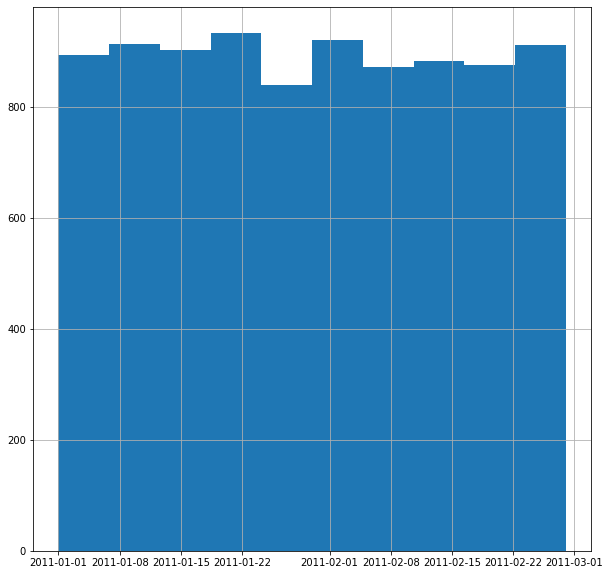

In [37]:
plt.figure(figsize=(10, 10))
ds['Effective To Date'].hist()

### Не похоже на какой-то информативный признак

In [38]:
col_to_drop.append('Effective To Date')

# Gender

In [39]:
ds = pd.get_dummies(ds, prefix='gender_', columns=['Gender'],drop_first=True)

# Location Code

<AxesSubplot:>

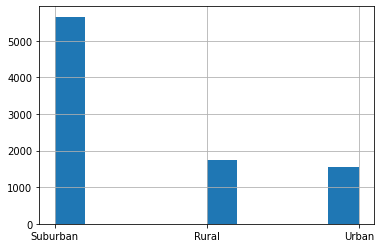

In [40]:
ds['Location Code'].hist()

In [41]:
ds = pd.get_dummies(ds, prefix='location_', columns=['Location Code'],drop_first=True)

In [42]:
ds.drop(columns=col_to_drop).head()

,Customer Lifetime Value,Income,Marital Status,Months Since Last Claim,Months Since Policy Inception,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,...,edu__Doctor,edu__High School or Below,edu__Master,emp_stat__Employed,emp_stat__Medical Leave,emp_stat__Retired,emp_stat__Unemployed,gender__M,location__Suburban,location__Urban
0,2763.519279,56274,Married,32,5,1,Corporate Auto,Corporate L3,Offer1,Agent,...,0,0,0,1,0,0,0,0,1,0
1,6979.535903,0,Single,13,42,8,Personal Auto,Personal L3,Offer3,Agent,...,0,0,0,0,0,0,1,0,1,0
2,12887.431650,48767,Married,18,38,2,Personal Auto,Personal L3,Offer1,Agent,...,0,0,0,1,0,0,0,0,1,0
3,7645.861827,0,Married,18,65,7,Corporate Auto,Corporate L2,Offer1,Call Center,...,0,0,0,0,0,0,1,1,1,0
4,2813.692575,43836,Single,12,44,1,Personal Auto,Personal L1,Offer1,Agent,...,0,0,0,1,0,0,0,1,0,0


# Marital Status

<AxesSubplot:>

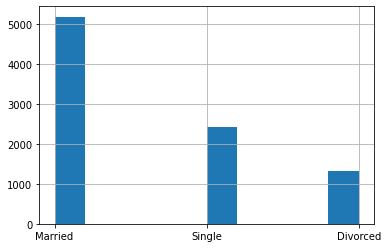

In [43]:
ds['Marital Status'].hist()

In [44]:
ds = pd.get_dummies(ds, prefix='marital_', columns=['Marital Status'],drop_first=True)

# Number of Policies

<AxesSubplot:>

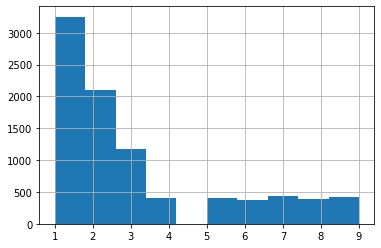

In [45]:
ds['Number of Policies'].hist()

### Так и оставим

In [46]:
ds.drop(columns=col_to_drop).columns

Index(['Customer Lifetime Value', 'Income', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size', 'mon_prem_auto_log', 'сomplaints',
       'state__California', 'state__Nevada', 'state__Oregon',
       'state__Washington', 'response__Yes', 'coverage__Extended',
       'coverage__Premium', 'edu__College', 'edu__Doctor',
       'edu__High School or Below', 'edu__Master', 'emp_stat__Employed',
       'emp_stat__Medical Leave', 'emp_stat__Retired', 'emp_stat__Unemployed',
       'gender__M', 'location__Suburban', 'location__Urban',
       'marital__Married', 'marital__Single'],
      dtype='object')

# Policy Type

<AxesSubplot:>

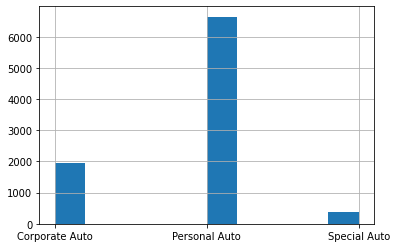

In [47]:
ds['Policy Type'].hist()

In [48]:
ds = pd.get_dummies(ds, prefix='policy_type_', columns=['Policy Type'],drop_first=True)

# Policy

<AxesSubplot:>

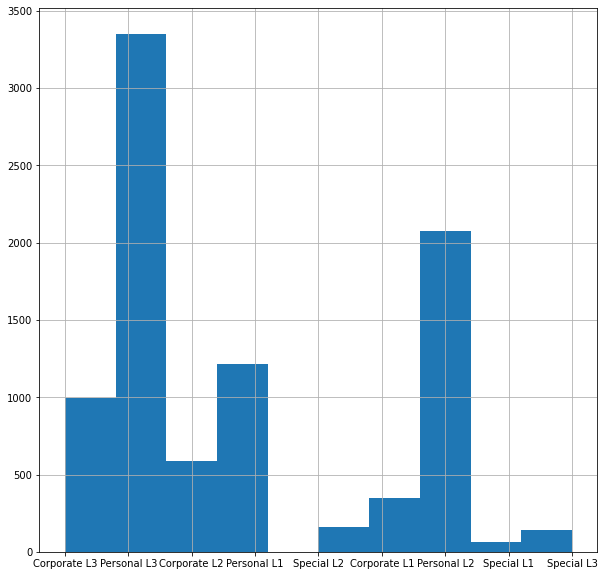

In [49]:
plt.figure(figsize=(10, 10))
ds['Policy'].hist()

### Кажется, колонка Policy Type уже не нужна, можно разбить полис на Corporate/ Personal/Special и на L1/L2/L3

In [50]:
ds['Policy_Type_L'] = ds['Policy'].apply(lambda x: x.split()[1])
ds['Policy_Type_L']

0       L3
1       L3
2       L3
3       L2
4       L1
        ..
9129    L1
9130    L3
9131    L2
9132    L2
9133    L3
Name: Policy_Type_L, Length: 8945, dtype: object

In [51]:
ds = pd.get_dummies(ds, prefix='policy_type_l_', columns=['Policy_Type_L'],drop_first=True)

In [52]:
col_to_drop.append('Policy')
ds

,Customer,Customer Lifetime Value,Effective To Date,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy,...,emp_stat__Unemployed,gender__M,location__Suburban,location__Urban,marital__Married,marital__Single,policy_type__Personal Auto,policy_type__Special Auto,policy_type_l__L2,policy_type_l__L3
0,BU79786,2763.519279,2011-02-24,56274,69,32,5,0,1,Corporate L3,...,0,0,1,0,1,0,0,0,0,1
1,QZ44356,6979.535903,2011-01-31,0,94,13,42,0,8,Personal L3,...,1,0,1,0,0,1,1,0,0,1
2,AI49188,12887.431650,2011-02-19,48767,108,18,38,0,2,Personal L3,...,0,0,1,0,1,0,1,0,0,1
3,WW63253,7645.861827,2011-01-20,0,106,18,65,0,7,Corporate L2,...,1,1,1,0,1,0,0,0,1,0
4,HB64268,2813.692575,2011-02-03,43836,73,12,44,0,1,Personal L1,...,0,1,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,23405.987980,2011-02-10,71941,73,18,89,0,2,Personal L1,...,0,1,0,1,1,0,1,0,0,0
9130,PK87824,3096.511217,2011-02-12,21604,79,14,28,0,1,Corporate L3,...,0,0,1,0,0,0,0,0,0,1
9131,TD14365,8163.890428,2011-02-06,0,85,9,37,3,2,Corporate L2,...,1,1,1,0,0,1,0,0,1,0
9132,UP19263,7524.442436,2011-02-03,21941,96,34,3,0,3,Personal L2,...,0,1,1,0,1,0,1,0,1,0


In [53]:
ds.columns

Index(['Customer', 'Customer Lifetime Value', 'Effective To Date', 'Income',
       'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy', 'Renew Offer Type', 'Sales Channel',
       'Total Claim Amount', 'Vehicle Class', 'Vehicle Size',
       'mon_prem_auto_log', 'сomplaints', 'state__California', 'state__Nevada',
       'state__Oregon', 'state__Washington', 'response__Yes',
       'coverage__Extended', 'coverage__Premium', 'edu__College',
       'edu__Doctor', 'edu__High School or Below', 'edu__Master',
       'emp_stat__Employed', 'emp_stat__Medical Leave', 'emp_stat__Retired',
       'emp_stat__Unemployed', 'gender__M', 'location__Suburban',
       'location__Urban', 'marital__Married', 'marital__Single',
       'policy_type__Personal Auto', 'policy_type__Special Auto',
       'policy_type_l__L2', 'policy_type_l__L3'],
      dtype='object')

# Renew Offer Type

<AxesSubplot:>

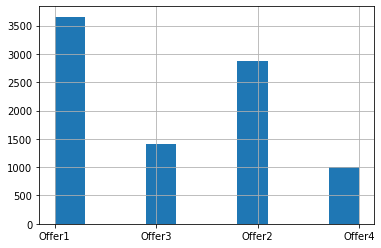

In [54]:
ds['Renew Offer Type'].hist()

In [55]:
ds = pd.get_dummies(ds, prefix='renew_offer_type_', columns=['Renew Offer Type'],drop_first=True)

# Sales Channel

<AxesSubplot:>

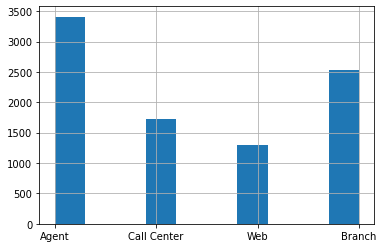

In [56]:
ds['Sales Channel'].hist()

In [57]:
ds = pd.get_dummies(ds, prefix='sales_channel_', columns=['Sales Channel'],drop_first=True)

# Total Claim Amount

<AxesSubplot:>

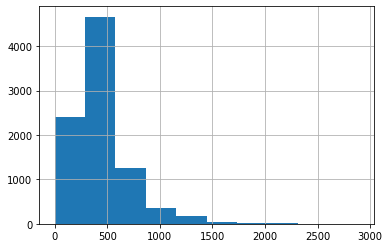

In [58]:
ds['Total Claim Amount'].hist()

# Vehicle Class

<AxesSubplot:>

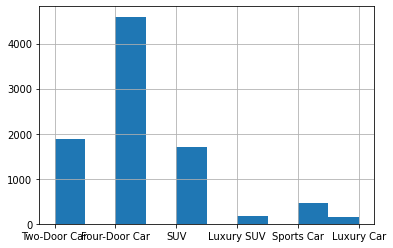

In [59]:
ds['Vehicle Class'].hist()

In [60]:
ds = pd.get_dummies(ds, prefix='car_class_', columns=['Vehicle Class'],drop_first=True)

# Vehicle Size

<AxesSubplot:>

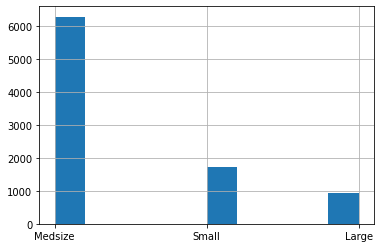

In [61]:
ds['Vehicle Size'].hist()

In [62]:
ds = pd.get_dummies(ds, prefix='car_size_', columns=['Vehicle Size'],drop_first=True)

In [63]:
ds.drop(columns=col_to_drop).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8945 entries, 0 to 9133
Data columns (total 45 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer Lifetime Value        8945 non-null   float64
 1   Income                         8945 non-null   int64  
 2   Months Since Last Claim        8945 non-null   int64  
 3   Months Since Policy Inception  8945 non-null   int64  
 4   Number of Policies             8945 non-null   int64  
 5   Total Claim Amount             8945 non-null   float64
 6   mon_prem_auto_log              8945 non-null   float64
 7   сomplaints                     8945 non-null   int64  
 8   state__California              8945 non-null   uint8  
 9   state__Nevada                  8945 non-null   uint8  
 10  state__Oregon                  8945 non-null   uint8  
 11  state__Washington              8945 non-null   uint8  
 12  response__Yes                  8945 non-null   u

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.pipeline import Pipeline

In [65]:
def show_metrics(model, X_train, X_test, y_train, y_test):
    print("R2 на обучающем наборе: {:.2f}".format(model.score(X_train, y_train)))
    print("R2 на тестовом наборе: {:.2f}".format(model.score(X_test, y_test)))
    print("MAE: {:.2f}".format(mean_absolute_error(y_test, model.predict(X_test))))
    print("MSE: {:.2f}".format(mean_squared_error(y_test, model.predict(X_test))))

In [66]:
y = ds['Customer Lifetime Value']
col_to_drop.append('Customer Lifetime Value')
X_train, X_test, y_train, y_test = train_test_split(ds.drop(columns=col_to_drop), y, test_size=0.33,
                                                        random_state=42)
poly = PolynomialFeatures(2)
scaler = StandardScaler()
ridge = RidgeCV()
pipe = Pipeline([('poly', poly),('scaler', scaler), ('ridge', ridge)])
pipe.fit(X_train, y_train)
show_metrics(pipe, X_train, X_test, y_train, y_test)

R2 на обучающем наборе: 0.40
R2 на тестовом наборе: 0.18
MAE: 3316.91
MSE: 22960833.01


In [67]:
poly = PolynomialFeatures(2)
scaler = StandardScaler()
lasso = LassoCV()
pipe = Pipeline([('poly', poly),('scaler', scaler), ('lasso', lasso)])
pipe.fit(X_train, y_train)
show_metrics(pipe, X_train, X_test, y_train, y_test)

R2 на обучающем наборе: 0.30
R2 на тестовом наборе: 0.25
MAE: 3108.36
MSE: 21026109.09


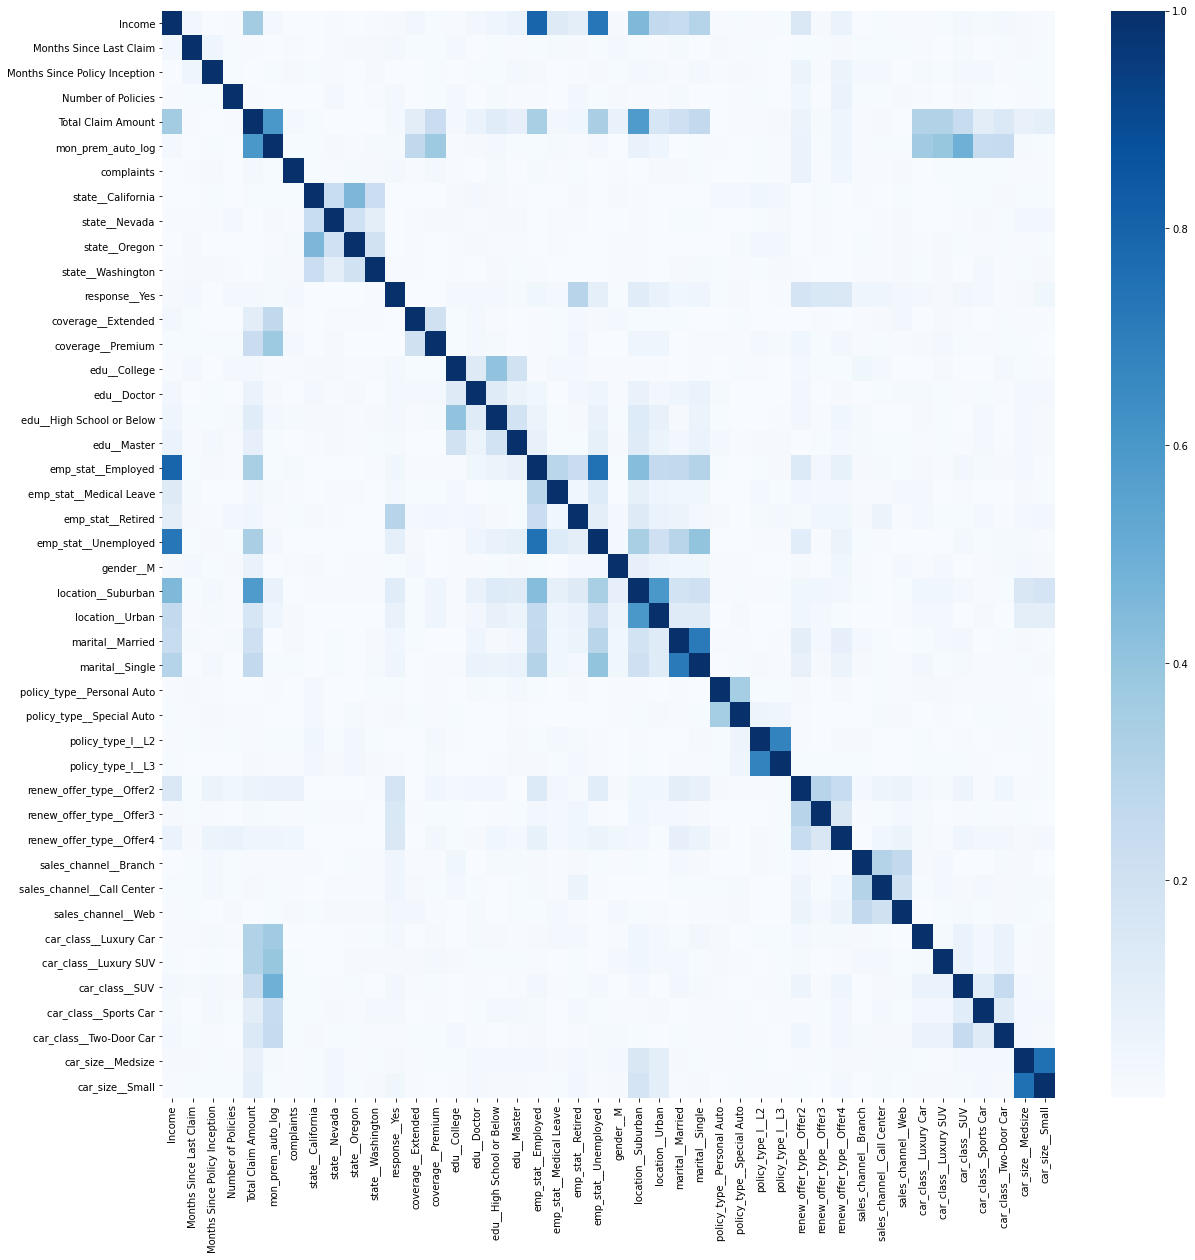

In [68]:
plt.figure(figsize=(20, 20))
sns.heatmap(ds.drop(col_to_drop, axis=1).corr().abs(), cmap='Blues')
plt.show()

In [69]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
show_metrics(rf, X_train, X_test, y_train, y_test)

R2 на обучающем наборе: 0.97
R2 на тестовом наборе: 0.77
MAE: 1023.47
MSE: 6298309.64


In [70]:
scaler = StandardScaler()
svr = SVR(kernel='sigmoid')
pipe = Pipeline([('scaler', scaler), ('ridsvrge', svr)])
pipe.fit(X_train, y_train)
show_metrics(pipe, X_train, X_test, y_train, y_test)

R2 на обучающем наборе: -0.08
R2 на тестовом наборе: -0.11
MAE: 3596.22
MSE: 31131571.73


<AxesSubplot:>

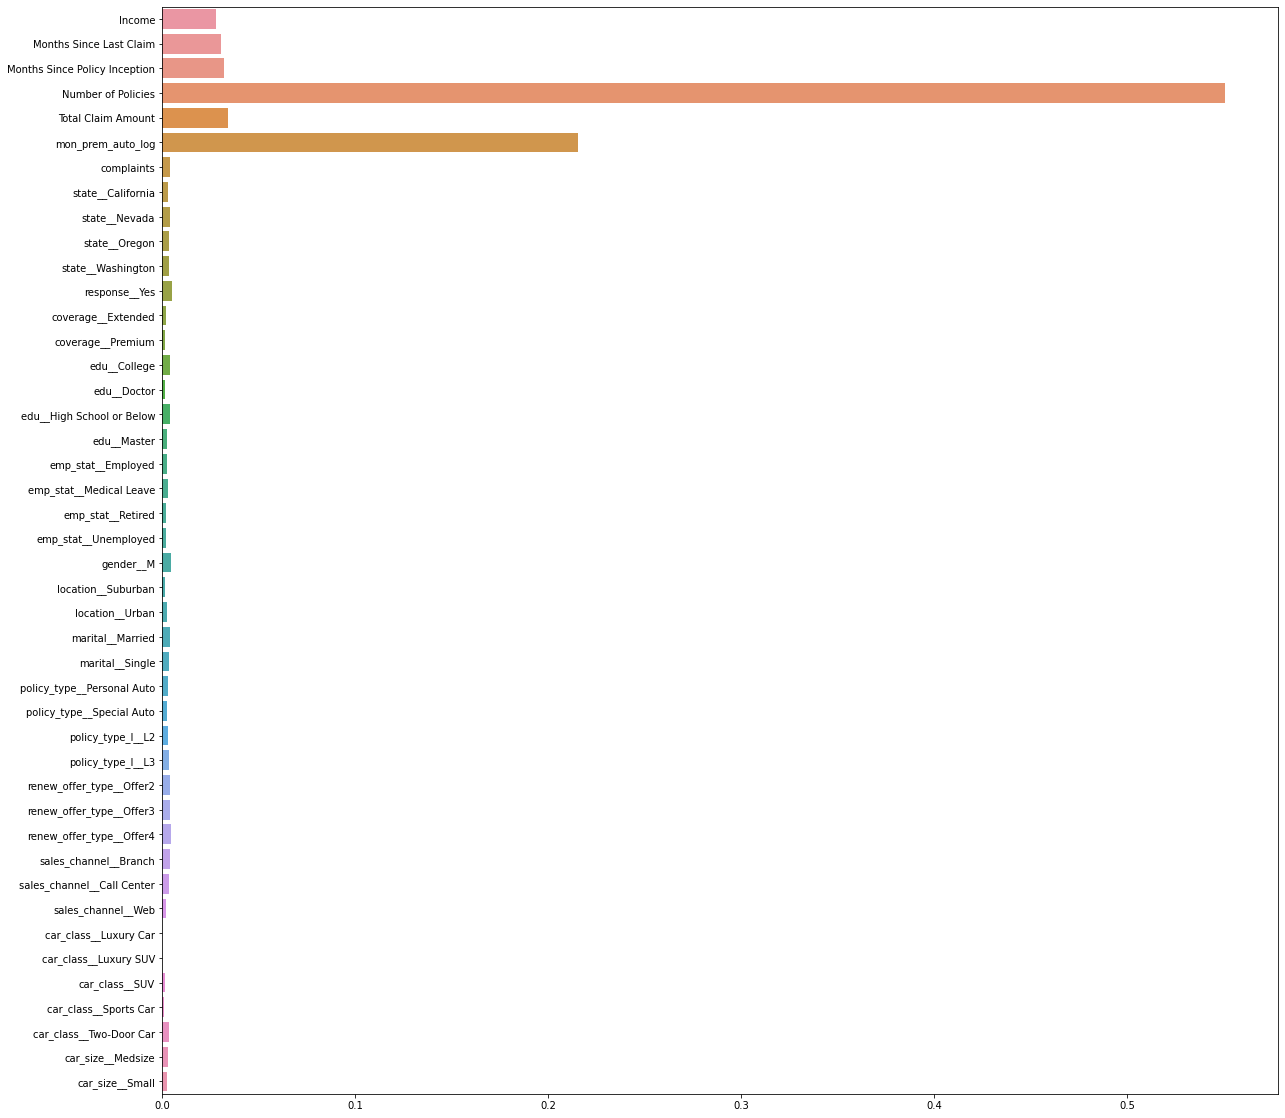

In [71]:
plt.figure(figsize=(20, 20))
sns.barplot(x=rf.feature_importances_, y = X_train.columns)

## Видно, что линейные модели показывают плохой результат, RandomForest показывает довольно хороший результат, но с большим переочением

In [72]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[50, 100],
    'max_depth':[ 5, 7, 8, 9, 10, 12, 15],
    'max_features':[
        'auto', 
        'sqrt',
        'log2'
    ],
    'bootstrap': [True, False]
}

rfCV = GridSearchCV(
    estimator=RandomForestRegressor(),
    param_grid= params,
    n_jobs=-1,
    verbose=1
)

rfCV.fit(X_train, y_train)
show_metrics(rfCV, X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 84 candidates, totalling 420 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   37.0s
[Parallel(n_jobs=-1)]: Done 420 out of 420 | elapsed:  2.0min finished


R2 на обучающем наборе: 0.95
R2 на тестовом наборе: 0.77
MAE: 1026.13
MSE: 6310126.78


In [73]:
rfCV.best_estimator_

RandomForestRegressor(max_depth=15)

<AxesSubplot:>

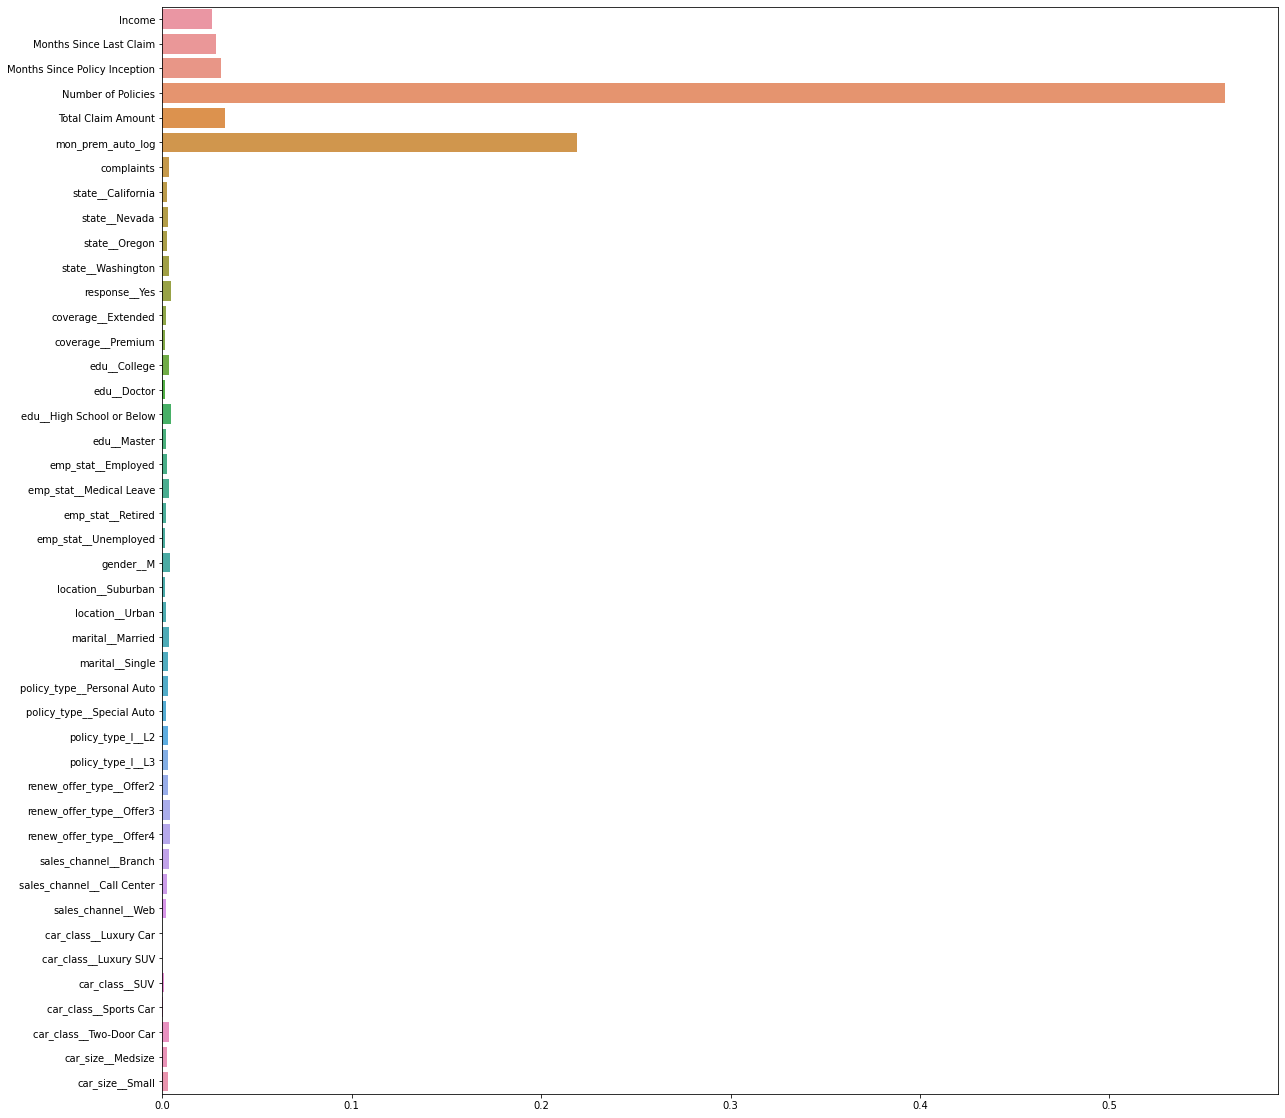

In [74]:
plt.figure(figsize=(20, 20))
sns.barplot(x=rfCV.best_estimator_.feature_importances_, y = X_train.columns)

In [75]:
dataset.drop(columns=['Customer Lifetime Value','Customer']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          9134 non-null   object 
 1   Response                       9134 non-null   object 
 2   Coverage                       9134 non-null   object 
 3   Education                      9134 non-null   object 
 4   Effective To Date              9134 non-null   object 
 5   EmploymentStatus               9134 non-null   object 
 6   Gender                         9134 non-null   object 
 7   Income                         9134 non-null   int64  
 8   Location Code                  9134 non-null   object 
 9   Marital Status                 9134 non-null   object 
 10  Monthly Premium Auto           9134 non-null   int64  
 11  Months Since Last Claim        9134 non-null   int64  
 12  Months Since Policy Inception  9134 non-null   i

In [76]:
cat_features=[0,1,2,3,4,5,6,8,9,15,16,17,18,20,21]

In [77]:
ds.drop(columns=col_to_drop).shape

(8945, 44)

# Catboost

In [78]:
%%timeit
from catboost import CatBoostRegressor

cat = CatBoostRegressor(task_type="GPU", max_depth=10)
cat.fit(X_train, y_train, silent=True)

6.26 s ± 220 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [79]:
%%timeit
from catboost import CatBoostRegressor

cat = CatBoostRegressor(task_type="CPU", max_depth=10)
cat.fit(X_train, y_train, silent=True)

13.4 s ± 1.12 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [80]:
from catboost import CatBoostRegressor

cat = CatBoostRegressor(task_type="GPU", max_depth=10,gpu_cat_features_storage='CpuPinnedMemory' )
cat.fit(X_train, y_train, silent=True)
show_metrics(cat, X_train, X_test, y_train, y_test)

R2 на обучающем наборе: 0.49
R2 на тестовом наборе: 0.45
MAE: 2374.54
MSE: 15434407.58


<AxesSubplot:>

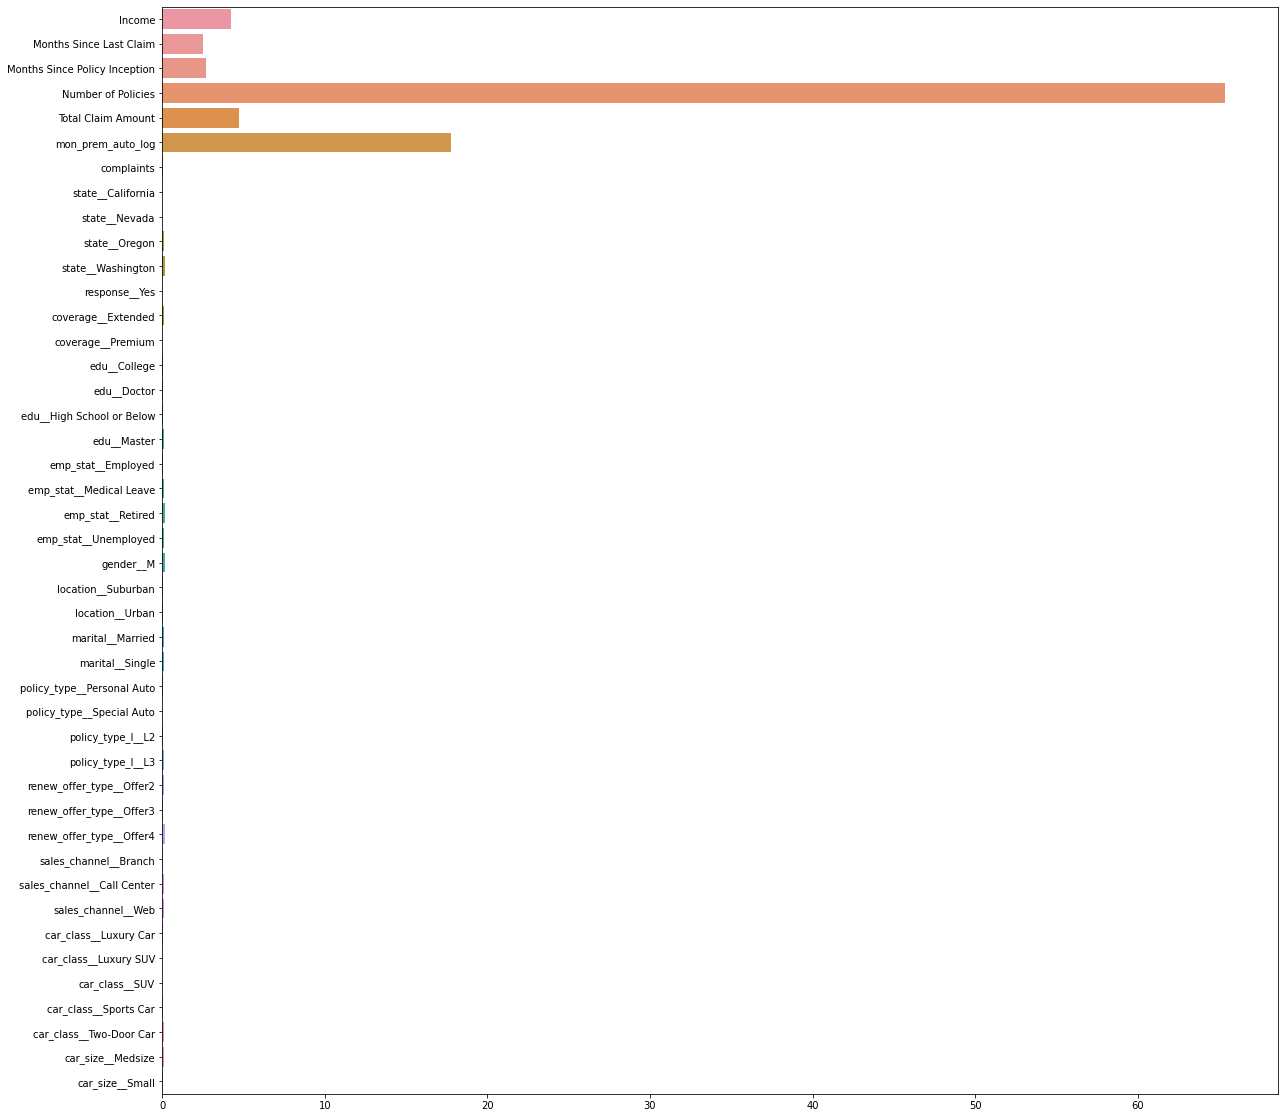

In [81]:
plt.figure(figsize=(20, 20))
sns.barplot(x=cat.feature_importances_, y = X_train.columns)

In [82]:
from catboost import CatBoostRegressor

catCPU = CatBoostRegressor(task_type="CPU", max_depth=16)
catCPU.fit(X_train, y_train, silent=True)
show_metrics(catCPU, X_train, X_test, y_train, y_test)

R2 на обучающем наборе: 1.00
R2 на тестовом наборе: 0.71
MAE: 1281.38
MSE: 7982008.70


In [83]:
catCPU.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'RMSE',
 'iterations': 1000,
 'sampling_frequency': 'PerTree',
 'leaf_estimation_method': 'Newton',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': True,
 'model_size_reg': 0.5,
 'subsample': 0.800000011920929,
 'use_best_model': False,
 'random_seed': 0,
 'depth': 16,
 'posterior_sampling': False,
 'border_count': 254,
 'classes_count': 0,
 'auto_class_weights': 'None',
 'sparse_features_conflict_fraction': 0,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'best_model_min_trees': 1,
 'model_shrink_rate': 0,
 'min_data_in_leaf': 1,
 'loss_function': 'RMSE',
 'learning_rate': 0.05368100106716156,
 'score_function': 'Cosine',
 'task_type': 'CPU',
 'leaf_estimation_iterations': 1,
 'bootstrap_type': 'MVS',
 'max_leav

In [84]:
cat.get_all_params()

{'nan_mode': 'Min',
 'gpu_ram_part': 0.95,
 'eval_metric': 'RMSE',
 'iterations': 1000,
 'fold_permutation_block': 64,
 'leaf_estimation_method': 'Newton',
 'observations_to_bootstrap': 'TestOnly',
 'grow_policy': 'SymmetricTree',
 'boosting_type': 'Ordered',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'devices': '-1',
 'pinned_memory_bytes': '104857600',
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': True,
 'gpu_cat_features_storage': 'CpuPinnedMemory',
 'fold_size_loss_normalization': False,
 'model_size_reg': 0.5,
 'subsample': 0.800000011920929,
 'use_best_model': False,
 'random_seed': 0,
 'depth': 10,
 'has_time': False,
 'fold_len_multiplier': 2,
 'border_count': 128,
 'min_fold_size': 100,
 'data_partition': 'FeatureParallel',
 'classes_count': 0,
 'auto_class_weights': 'None',
 'leaf_estimation_backtracking': 'AnyImprovement',
 'best_model_min_trees': 1,
 'min_data_in_leaf': 1,
 'add_ridge_penalty_to_loss_f

### Ну тут прям жуткое переобучение!
### Еще, похоже что настройки для CPU и GPU у Catboost отличаются. Дальше тогда выберем CPU чтобы подбирать поменьше параметров

In [85]:
catCPU = CatBoostRegressor(max_depth=6,
                           od_type = "Iter",
                           iterations=1000,
                           loss_function='RMSE', 
                           leaf_estimation_method="Newton")
catCPU.fit(X_train, y_train, silent=True)
show_metrics(catCPU, X_train, X_test, y_train, y_test)

R2 на обучающем наборе: 0.85
R2 на тестовом наборе: 0.77
MAE: 1176.63
MSE: 6399654.01


In [86]:
catCPU.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'RMSE',
 'iterations': 1000,
 'sampling_frequency': 'PerTree',
 'leaf_estimation_method': 'Newton',
 'od_pval': 0,
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'od_type': 'Iter',
 'rsm': 1,
 'boost_from_average': True,
 'model_size_reg': 0.5,
 'subsample': 0.800000011920929,
 'use_best_model': False,
 'od_wait': 20,
 'random_seed': 0,
 'depth': 6,
 'posterior_sampling': False,
 'border_count': 254,
 'classes_count': 0,
 'auto_class_weights': 'None',
 'sparse_features_conflict_fraction': 0,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'best_model_min_trees': 1,
 'model_shrink_rate': 0,
 'min_data_in_leaf': 1,
 'loss_function': 'RMSE',
 'learning_rate': 0.029999999329447743,
 'score_function': 'Cosine',
 'task_type': 'CPU',
 'leaf_estimation_i

### Перебрав разные параметры loss_function, iterations, max_depth выходит что стандартные настройки показывают себя лучше всего в данном случае

### Попробуем Catboost на сыром датасете

In [87]:
y = dataset['Customer Lifetime Value']
to_drop = ['Customer Lifetime Value','Customer']
X_train, X_test, y_train, y_test = train_test_split(dataset.drop(columns=to_drop), y, test_size=0.33,
                                                        random_state=42)
cat_features=[0,1,2,3,4,5,6,8,9,15,16,17,18,20,21]

cat_raw = CatBoostRegressor(max_depth=12)
cat_raw.fit(X_train, y_train, silent=True, cat_features=cat_features)
show_metrics(cat_raw, X_train, X_test, y_train, y_test)

R2 на обучающем наборе: 0.90
R2 на тестовом наборе: 0.71
MAE: 1631.94
MSE: 15114063.00


In [88]:
cat_raw = CatBoostRegressor(max_depth=11)
cat_raw.fit(X_train, y_train, silent=True, cat_features=cat_features)
show_metrics(cat_raw, X_train, X_test, y_train, y_test)

R2 на обучающем наборе: 0.88
R2 на тестовом наборе: 0.71
MAE: 1645.68
MSE: 14952234.89


In [89]:
cat_raw = CatBoostRegressor(max_depth=10)
cat_raw.fit(X_train, y_train, silent=True, cat_features=cat_features)
show_metrics(cat_raw, X_train, X_test, y_train, y_test)

R2 на обучающем наборе: 0.86
R2 на тестовом наборе: 0.72
MAE: 1656.15
MSE: 14780335.34


In [90]:
cat_raw = CatBoostRegressor(max_depth=9)
cat_raw.fit(X_train, y_train, silent=True, cat_features=cat_features)
show_metrics(cat_raw, X_train, X_test, y_train, y_test)

R2 на обучающем наборе: 0.85
R2 на тестовом наборе: 0.72
MAE: 1671.23
MSE: 14847119.67


In [91]:
cat_raw = CatBoostRegressor()
cat_raw.fit(X_train, y_train, silent=True, cat_features=cat_features)
show_metrics(cat_raw, X_train, X_test, y_train, y_test)

R2 на обучающем наборе: 0.77
R2 на тестовом наборе: 0.70
MAE: 1732.14
MSE: 15552161.81


### Ну хотя бы  EDA не прошло даром, без него результаты чуть хуже

In [92]:
y = ds['Customer Lifetime Value']
col_to_drop.append('Customer Lifetime Value')
X_train, X_test, y_train, y_test = train_test_split(ds.drop(columns=col_to_drop), y, test_size=0.33,
                                                        random_state=42)

# XGBoost

In [93]:
from xgboost import XGBRegressor

xgbr = XGBRegressor()
xgbr.fit(X_train, y_train)
show_metrics(xgbr, X_train, X_test, y_train, y_test)

R2 на обучающем наборе: 0.96
R2 на тестовом наборе: 0.75
MAE: 1284.54
MSE: 7011202.48


In [94]:
from sklearn.model_selection import RandomizedSearchCV

params = {
    'booster':['gbtree', 'gblinear','dart'],
    'max_depth':[ 4,5,6, 7, 10, 12]
}

xgbrCV = RandomizedSearchCV(
    estimator=XGBRegressor(eval_metric='rmse'),
    param_distributions= params,
    n_jobs=-1,
    verbose=1
)

xgbrCV.fit(X_train, y_train)
show_metrics(xgbrCV, X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   22.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   27.8s finished


R2 на обучающем наборе: 0.92
R2 на тестовом наборе: 0.75
MAE: 1326.58
MSE: 6915597.28


In [95]:
xgbrCV.best_estimator_.get_xgb_params()

{'objective': 'reg:squarederror',
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'gpu_id': -1,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 5,
 'min_child_weight': 1,
 'monotone_constraints': '()',
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None,
 'eval_metric': 'rmse'}

In [96]:
xgbr = XGBRegressor(eval_metric='rmse', booster='dart',max_depth=4, learning_rate=0.215)
xgbr.fit(X_train, y_train)
show_metrics(xgbr, X_train, X_test, y_train, y_test)

R2 на обучающем наборе: 0.84
R2 на тестовом наборе: 0.77
MAE: 1260.33
MSE: 6549118.37


# LightGBM

In [97]:
from lightgbm import LGBMRegressor

lgmb = LGBMRegressor()
lgmb.fit(X_train, y_train)
show_metrics(lgmb, X_train, X_test, y_train, y_test)

R2 на обучающем наборе: 0.91
R2 на тестовом наборе: 0.76
MAE: 1092.67
MSE: 6620758.42


In [98]:
lgmb.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [99]:
lgmb = LGBMRegressor(max_depth=6, 
                     learning_rate=0.1, 
                     num_leaves=100, 
                     n_estimators=100)
lgmb.fit(X_train, y_train)
show_metrics(lgmb, X_train, X_test, y_train, y_test)

R2 на обучающем наборе: 0.85
R2 на тестовом наборе: 0.77
MAE: 1149.46
MSE: 6416661.70


### В принципе, можно сказать, что при таком EDA на данном датасете показывают близкие метрики: R2 ~ 0.77 и MSE ~ 6,4М, близкий результат показывает RandomForest(хотя показатели на train довольно высоки, что говорит о переобучении). 
### Можно отметить, что Catboost показывает высокий результат на необработанном датасете, и EDA дает прирост по R2 всего ~0.05. Так что если датасет содержит много категориальных признаков очень удобно использовать эту библиотеку, но при хорошем EDA глобальной разницы между ними не видно.